In [1]:
from bs4 import BeautifulSoup
from scrape import extract
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale

In [2]:
df2022 = extract_players("2022", "rb", "PPR")
df2022

,Name,RUSHING_ATT,RUSHING_YDS,RUSHING_Y/A,RUSHING_LG,RUSHING_20+,RUSHING_TD,RECEIVING_REC,RECEIVING_TGT,RECEIVING_YDS,RECEIVING_Y/R,RECEIVING_TD,MISC_FL,MISC_G,MISC_FPTS,MISC_FPTS/G,MISC_ROST,name
Rank,,,,,,,,,,,,,,,,,,
1,Austin Ekeler (LAC),204,915,4.5,72,10,13,107,127,722,6.7,5,3,17,372.7,21.9,100.0%,austin-ekeler
2,Christian McCaffrey (SF),244,1139,4.7,49,14,8,85,108,741,8.7,5,0,17,356.4,21.0,100.0%,christian-mccaffrey
3,Josh Jacobs (LV),340,1653,4.9,86,14,12,53,64,400,7.5,0,1,17,328.3,19.3,99.9%,josh-jacobs
4,Derrick Henry (TEN),349,1538,4.4,56,20,13,33,41,398,12.1,0,3,16,302.8,18.9,99.9%,derrick-henry
5,Saquon Barkley (NYG),295,1312,4.4,68,16,10,57,76,338,5.9,0,0,16,284.0,17.8,99.9%,saquon-barkley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,John Kelly Jr. (CLE),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.2%,john-kelly
264,Tim Flanders (NO),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0%,tim-flanders
265,Willie Carter (CHI),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0%,willie-carter


In [3]:
production2022 = df2022[['name', 'MISC_FPTS/G']]

In [4]:
names2022 = list(df2022["name"].head(100))
dists2022 = make_dists(names2022, "2022", "rb")
dists2022.head(20)

austin-ekeler
christian-mccaffrey
josh-jacobs
derrick-henry
saquon-barkley
nick-chubb
rhamondre-stevenson
tony-pollard
aaron-jones
joe-mixon
dalvin-cook
leonard-fournette
jamaal-williams
najee-harris-rb
miles-sanders
alvin-kamara
travis-etienne
kenneth-walker-rb
james-conner
jerick-mckinnon
dandre-swift
ezekiel-elliott
devin-singletary
david-montgomery
raheem-mostert
aj-dillon
dameon-pierce
antonio-gibson
tyler-allgeier
jeffery-wilson
cordarrelle-patterson
latavius-murray
jonathan-taylor
samaje-perine
cam-akers
rachaad-white
isiah-pacheco
donta-foreman
kareem-hunt
michael-carter-rb
khalil-herbert
breece-hall
brian-robinson-jr
james-cook
kenyan-drake
clyde-edwards-helaire
jaylen-warren
damien-harris-rb
eno-benjamin
james-robinson
alexander-mattison
kenneth-gainwell
chuba-hubbard
melvin-gordon
deon-jackson
nyheim-hines
jk-dobbins
dontrell-hilliard
chase-edmonds
darrell-henderson
rex-burkhead
jamycal-hasty
joshua-kelley
zack-moss
matt-breida
gus-edwards
zonovan-bam-knight
jd-mckissic
amee

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,austin-ekeler,27,17,6.294118,2.945879,7.470588,4.131908,42.470588,21.038110,7.064706,...,0.294118,0.455645,12.000000,4.158620,53.823529,39.553739,0.764706,0.729981,17.9,0
1,christian-mccaffrey,26,17,5.000000,2.326320,6.352941,2.888948,43.588235,25.233169,8.747059,...,0.294118,0.455645,14.352941,5.301955,67.000000,32.972359,0.470588,0.499134,21.1,0
2,josh-jacobs,24,17,3.117647,1.676213,3.764706,2.015511,23.529412,17.563725,7.788235,...,0.000000,0.000000,20.000000,6.145299,97.235294,49.222818,0.705882,0.892103,10.9,1
3,derrick-henry,28,16,2.062500,1.390537,2.562500,1.730923,24.875000,23.924033,9.675000,...,0.000000,0.000000,21.812500,6.085010,96.125000,45.852856,0.812500,0.726184,9.0,0
4,saquon-barkley,25,16,3.562500,1.730923,4.750000,2.250000,21.125000,13.882881,6.031250,...,0.000000,0.000000,18.437500,6.855370,82.000000,41.019812,0.625000,0.484123,14.6,1
5,nick-chubb,26,17,1.588235,1.374508,2.176471,1.382040,14.058824,14.173175,6.817647,...,0.058824,0.235294,17.764706,4.544284,89.705882,31.870629,0.705882,0.892103,6.9,2
6,rhamondre-stevenson,24,17,4.058824,2.338189,5.176471,2.281261,24.764706,24.822972,4.817647,...,0.058824,0.235294,12.352941,5.379057,61.176471,42.613496,0.294118,0.570315,16.3,0
7,tony-pollard,25,16,2.437500,1.869784,3.437500,2.344375,23.187500,28.478542,6.831250,...,0.187500,0.526634,12.062500,4.436620,62.937500,37.579031,0.562500,0.863767,9.9,0
8,aaron-jones,27,17,3.470588,1.752902,4.235294,1.925965,23.235294,14.707059,7.076471,...,0.294118,0.570315,12.529412,4.766521,65.941176,43.218284,0.117647,0.322190,12.8,0
9,joe-mixon,25,15,4.000000,1.897367,5.000000,2.607681,29.400000,17.575741,6.986667,...,0.133333,0.339935,14.133333,6.621849,55.066667,36.102570,0.466667,1.024153,12.3,0


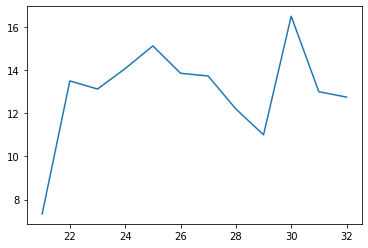

In [5]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

In [6]:
dists2022[dists2022["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,austin-ekeler,27,17,6.294118,2.945879,7.470588,4.131908,42.470588,21.038110,7.064706,...,0.294118,0.455645,12.000000,4.158620,53.823529,39.553739,0.764706,0.729981,17.9,0
1,christian-mccaffrey,26,17,5.000000,2.326320,6.352941,2.888948,43.588235,25.233169,8.747059,...,0.294118,0.455645,14.352941,5.301955,67.000000,32.972359,0.470588,0.499134,21.1,0
3,derrick-henry,28,16,2.062500,1.390537,2.562500,1.730923,24.875000,23.924033,9.675000,...,0.000000,0.000000,21.812500,6.085010,96.125000,45.852856,0.812500,0.726184,9.0,0
6,rhamondre-stevenson,24,17,4.058824,2.338189,5.176471,2.281261,24.764706,24.822972,4.817647,...,0.058824,0.235294,12.352941,5.379057,61.176471,42.613496,0.294118,0.570315,16.3,0
7,tony-pollard,25,16,2.437500,1.869784,3.437500,2.344375,23.187500,28.478542,6.831250,...,0.187500,0.526634,12.062500,4.436620,62.937500,37.579031,0.562500,0.863767,9.9,0
8,aaron-jones,27,17,3.470588,1.752902,4.235294,1.925965,23.235294,14.707059,7.076471,...,0.294118,0.570315,12.529412,4.766521,65.941176,43.218284,0.117647,0.322190,12.8,0
9,joe-mixon,25,15,4.000000,1.897367,5.000000,2.607681,29.400000,17.575741,6.986667,...,0.133333,0.339935,14.133333,6.621849,55.066667,36.102570,0.466667,1.024153,12.3,0
11,leonard-fournette,27,16,4.562500,2.621277,5.187500,2.855231,32.687500,25.334558,6.268750,...,0.187500,0.390312,11.812500,6.672881,41.750000,31.449364,0.187500,0.390312,11.1,0
15,alvin-kamara,26,15,3.800000,2.343786,5.133333,2.679967,32.666667,28.179583,8.026667,...,0.133333,0.498888,14.866667,5.377319,59.800000,29.750518,0.133333,0.339935,15.0,0
18,jerick-mckinnon,30,17,3.294118,2.216640,4.176471,2.662049,30.117647,29.130300,7.288235,...,0.529412,0.696009,4.235294,2.776570,17.117647,17.966905,0.058824,0.235294,10.9,0


In [7]:
dists2022[dists2022["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
2,josh-jacobs,24,17,3.117647,1.676213,3.764706,2.015511,23.529412,17.563725,7.788235,...,0.000000,0.000000,20.000000,6.145299,97.235294,49.222818,0.705882,0.892103,10.9,1
4,saquon-barkley,25,16,3.562500,1.730923,4.750000,2.250000,21.125000,13.882881,6.031250,...,0.000000,0.000000,18.437500,6.855370,82.000000,41.019812,0.625000,0.484123,14.6,1
10,dalvin-cook,26,17,2.294118,1.404393,3.294118,1.933138,17.352941,21.690174,6.258824,...,0.117647,0.322190,15.529412,4.340204,69.000000,30.670929,0.470588,0.605625,8.3,1
13,najee-harris-rb,24,17,2.411765,1.880514,3.117647,2.422501,13.470588,12.788403,4.547059,...,0.176471,0.381220,16.000000,4.665266,60.823529,27.225065,0.411765,0.599885,9.3,1
16,travis-etienne,23,17,2.058824,1.109880,2.647059,1.369464,18.588235,12.788132,7.352941,...,0.000000,0.000000,12.941176,6.846816,66.176471,40.789611,0.294118,0.570315,7.6,1
17,james-conner,27,13,3.538462,1.646226,4.461538,1.823580,23.076923,8.444038,7.123077,...,0.076923,0.266469,14.076923,4.968540,60.153846,25.506699,0.538462,0.634324,8.7,1
19,dandre-swift,23,14,3.428571,1.545236,5.000000,1.812654,27.785714,14.852506,8.564286,...,0.214286,0.410326,7.071429,3.614737,38.714286,36.473921,0.357143,0.479157,11.9,1
21,devin-singletary,24,17,2.235294,2.101244,3.058824,2.436743,16.470588,19.656215,5.841176,...,0.058824,0.235294,10.470588,4.258108,48.352941,26.902747,0.294118,0.570315,9.1,1
22,david-montgomery,25,16,2.125000,1.408678,2.500000,1.620185,19.750000,18.236296,7.550000,...,0.062500,0.242061,12.562500,4.030644,50.062500,27.282020,0.312500,0.463512,10.6,1
23,raheem-mostert,30,16,1.937500,1.983329,2.625000,1.832860,12.625000,16.803552,5.443750,...,0.125000,0.330719,11.312500,3.786799,55.687500,32.788563,0.187500,0.390312,7.2,1


In [8]:
dists2022[dists2022['class'] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
5,nick-chubb,26,17,1.588235,1.374508,2.176471,1.382040,14.058824,14.173175,6.817647,...,0.058824,0.235294,17.764706,4.544284,89.705882,31.870629,0.705882,0.892103,6.9,2
12,jamaal-williams,27,17,0.705882,0.892103,0.941176,1.055550,4.294118,7.127121,2.717647,...,0.000000,0.000000,15.411765,4.325830,62.705882,31.046009,1.000000,0.970143,2.7,2
14,miles-sanders,25,17,1.176471,0.984306,1.529412,1.091014,4.588235,8.029789,2.188235,...,0.000000,0.000000,15.235294,4.570100,74.647059,35.796716,0.647059,0.762440,4.9,2
20,ezekiel-elliott,26,15,1.133333,0.956847,1.533333,1.257864,6.133333,9.344279,3.166667,...,0.000000,0.000000,15.400000,3.302524,58.400000,19.727477,0.800000,0.653197,4.1,2
24,aj-dillon,24,17,1.647059,1.492774,2.529412,1.818779,12.117647,12.915483,5.317647,...,0.000000,0.000000,10.941176,3.872537,45.294118,20.084424,0.411765,0.599885,7.6,2
27,tyler-allgeier,22,16,1.000000,1.224745,1.062500,1.390537,8.687500,16.358174,5.462500,...,0.062500,0.242061,13.125000,4.768058,64.687500,34.490431,0.187500,0.390312,4.1,2
28,jeffery-wilson,26,16,1.375000,1.111024,2.312500,1.685184,11.562500,11.157782,5.787500,...,0.062500,0.242061,11.000000,5.350234,53.750000,33.633131,0.312500,0.463512,6.3,2
29,cordarrelle-patterson,31,13,1.615385,1.595111,2.384615,2.271511,9.384615,11.472633,4.584615,...,0.000000,0.000000,11.076923,4.480068,53.461538,35.733233,0.615385,0.624926,7.5,2
30,latavius-murray,32,14,1.928571,1.334396,2.500000,1.721710,9.428571,8.217701,5.585714,...,0.000000,0.000000,12.214286,5.466503,54.285714,33.289699,0.428571,0.494872,6.1,2
33,cam-akers,23,15,0.866667,1.087300,1.200000,1.107550,7.800000,11.984434,3.613333,...,0.000000,0.000000,12.533333,5.678811,52.400000,37.210751,0.466667,0.884433,3.4,2


In [9]:
dists2022[dists2022["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
37,kareem-hunt,26,17,2.058824,1.109880,2.588235,1.140631,12.352941,8.477938,5.511765,...,0.058824,0.235294,7.235294,3.387336,27.529412,19.778532,0.176471,0.381220,8.1,3
42,james-cook,22,17,1.235294,1.628041,1.882353,1.936715,10.588235,14.487556,5.682353,...,0.058824,0.235294,5.352941,4.129395,30.882353,29.122222,0.117647,0.322190,5.6,3
45,jaylen-warren,23,16,1.750000,1.145644,2.062500,1.297534,13.375000,12.333263,6.156250,...,0.000000,0.000000,4.812500,3.320744,23.687500,19.699996,0.062500,0.242061,5.8,3
47,eno-benjamin,23,13,1.923077,1.439099,2.615385,2.167539,14.846154,11.086001,6.453846,...,0.000000,0.000000,5.923077,4.122388,24.076923,23.133265,0.153846,0.360801,6.6,3
49,alexander-mattison,24,17,0.882353,0.962983,1.058824,1.392019,5.352941,6.416350,4.176471,...,0.058824,0.235294,4.352941,2.806320,16.647059,16.273187,0.294118,0.570315,2.7,3
50,kenneth-gainwell,23,17,1.352941,1.134547,1.705882,1.361863,9.941176,12.191948,4.900000,...,0.000000,0.000000,3.117647,2.083051,14.117647,11.656265,0.235294,0.424183,5.4,3
52,melvin-gordon,29,10,2.500000,1.746425,3.200000,2.039608,22.300000,17.193313,7.060000,...,0.000000,0.000000,9.000000,3.687818,31.800000,16.271447,0.200000,0.400000,5.6,3
54,nyheim-hines,25,16,1.875000,1.932453,2.312500,1.959552,15.062500,15.896024,6.525000,...,0.062500,0.242061,1.500000,1.457738,2.062500,5.617704,0.062500,0.242061,6.4,3
56,dontrell-hilliard,27,12,1.750000,1.361678,2.166667,1.462494,14.750000,16.980994,8.050000,...,0.333333,0.623610,1.833333,2.034426,12.083333,22.054698,0.000000,0.000000,5.7,3
57,chase-edmonds,26,13,1.230769,1.249852,1.846154,1.230769,12.076923,14.646930,5.307692,...,0.076923,0.266469,5.230769,3.016719,18.846154,13.381078,0.153846,0.532939,4.2,3


In [10]:
dists2022[dists2022["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
62,zack-moss,24,13,0.846154,1.702765,1.000000,1.664101,3.000000,5.777942,1.292308,...,0.000000,0.000000,7.153846,7.283767,35.076923,35.486642,0.076923,0.266469,2.2,4
64,gus-edwards,27,9,0.000000,0.000000,0.222222,0.415740,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.666667,4.618802,48.111111,29.886617,0.333333,0.666667,0.4,4
70,mark-ingram,32,10,1.600000,1.562050,1.800000,1.469694,6.800000,7.626270,2.950000,...,0.000000,0.000000,6.200000,3.155947,23.300000,16.970857,0.100000,0.300000,3.5,4
73,boston-scott,27,15,0.333333,0.596285,0.400000,0.611010,1.000000,1.751190,0.866667,...,0.000000,0.000000,3.600000,2.628054,14.466667,14.155643,0.200000,0.400000,1.1,4
74,caleb-huntley,23,12,0.166667,0.372678,0.166667,0.372678,0.250000,0.595119,0.250000,...,0.000000,0.000000,6.333333,5.201496,30.500000,25.847308,0.083333,0.276385,0.5,4
75,elijah-mitchell-rb,24,5,0.600000,0.800000,0.800000,0.979796,1.400000,3.322650,0.600000,...,0.000000,0.000000,9.000000,4.690416,55.800000,18.787230,0.400000,0.800000,0.8,4
80,justice-hill,24,15,0.800000,0.979796,0.800000,0.979796,3.866667,4.856153,2.746667,...,0.000000,0.000000,3.266667,2.719477,17.466667,18.220379,0.000000,0.000000,2.5,4
83,jordan-mason,23,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.583333,3.616129,21.500000,22.562875,0.083333,0.276385,0.0,4
84,avery-williams-cb,23,16,0.750000,0.829156,0.812500,0.807678,3.312500,4.454194,2.031250,...,0.000000,0.000000,1.250000,1.436141,6.375000,8.192031,0.062500,0.242061,3.4,4
87,gary-brightwell,23,15,0.333333,0.699206,0.533333,1.087300,2.600000,6.086050,1.400000,...,0.000000,0.000000,2.066667,3.043390,9.400000,16.467341,0.066667,0.249444,1.5,4


2021 Data

In [11]:
df2021 = extract_players("2021", "rb", "PPR")

In [12]:
production2021 = df2021[['name', 'MISC_FPTS/G']]

In [13]:
names2021 = list(df2021["name"].head(100))
dists2021 = make_dists(names2021, "2021", "rb")
dists2021.head(20)

jonathan-taylor
austin-ekeler
najee-harris-rb
joe-mixon
james-conner
leonard-fournette
ezekiel-elliott
alvin-kamara
cordarrelle-patterson
antonio-gibson
aaron-jones
josh-jacobs
nick-chubb
damien-harris-rb
dandre-swift
dalvin-cook
javonte-williams
devin-singletary
darrel-williams
david-montgomery
melvin-gordon
derrick-henry
aj-dillon
james-robinson
myles-gaskin
elijah-mitchell-rb
darrell-henderson
tony-pollard
michael-carter-rb
saquon-barkley
devonta-freeman
sony-michel
devontae-booker
chase-edmonds
mike-davis-rb
chuba-hubbard
jd-mckissic
christian-mccaffrey
alexander-mattison
brandon-bolden
kenneth-gainwell
rashaad-penny
jamaal-williams
miles-sanders
ty-johnson
clyde-edwards-helaire
rhamondre-stevenson
nyheim-hines
kareem-hunt
mark-ingram
zack-moss
rex-burkhead
dernest-johnson
latavius-murray
kenyan-drake
boston-scott
donta-foreman
ameer-abdullah
justin-jackson-rb
samaje-perine
david-johnson-rb
ronald-jones-ii
khalil-herbert
kyle-juszczyk
jeremy-mcnichols
dontrell-hilliard
alex-collins

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,jonathan-taylor,22,17,2.352941,1.813063,3.000000,2.142017,21.176471,29.007576,7.717647,...,0.117647,0.322190,19.529412,6.362738,106.529412,42.329405,1.058824,0.998268,9.8,0
1,austin-ekeler,26,16,4.375000,2.027159,5.875000,2.869560,40.437500,19.915348,8.781250,...,0.500000,0.612372,12.875000,3.059310,56.937500,21.358455,0.750000,0.661438,13.9,0
2,najee-harris-rb,23,17,4.352941,2.785280,5.529412,3.648007,27.470588,21.796162,6.105882,...,0.176471,0.381220,18.058824,6.101789,70.588235,41.889292,0.411765,0.492153,14.2,0
3,joe-mixon,24,16,2.625000,2.260393,3.000000,2.371708,19.625000,24.949637,4.575000,...,0.187500,0.390312,18.250000,5.868347,75.312500,35.051246,0.812500,0.726184,8.6,0
4,james-conner,26,15,2.466667,2.578544,2.600000,2.678308,25.000000,27.978563,7.186667,...,0.200000,0.400000,13.466667,4.937836,50.133333,19.979545,1.000000,0.816497,6.6,0
5,leonard-fournette,26,14,4.928571,1.830858,6.000000,1.690309,32.428571,12.140336,6.957143,...,0.142857,0.349927,12.857143,4.940462,58.000000,30.168574,0.571429,0.903508,11.5,0
6,ezekiel-elliott,25,17,2.764706,1.925965,3.823529,2.281261,16.882353,13.109863,6.170588,...,0.117647,0.322190,13.941176,3.917841,58.941176,32.344598,0.588235,0.691020,10.0,1
7,alvin-kamara,25,13,3.615385,2.271511,5.153846,2.626672,33.769231,33.459858,7.546154,...,0.384615,0.486504,18.461538,6.558792,69.076923,40.033566,0.307692,0.461538,13.3,0
8,cordarrelle-patterson,30,16,3.250000,1.984313,4.312500,2.283603,34.250000,36.151591,8.387500,...,0.312500,0.768013,9.562500,3.856306,38.625000,27.071376,0.375000,0.599479,12.0,0
9,antonio-gibson,23,16,2.625000,1.798437,3.250000,1.952562,18.375000,18.271819,9.206250,...,0.187500,0.390312,16.125000,6.213644,64.812500,32.776170,0.437500,0.704339,9.5,0


In [14]:
dists2021prod = pd.merge(dists2021, production2022, how = 'inner', on = ['name'])

In [15]:
dists2021[dists2021["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,jonathan-taylor,22,17,2.352941,1.813063,3.000000,2.142017,21.176471,29.007576,7.717647,...,0.117647,0.322190,19.529412,6.362738,106.529412,42.329405,1.058824,0.998268,9.8,0
1,austin-ekeler,26,16,4.375000,2.027159,5.875000,2.869560,40.437500,19.915348,8.781250,...,0.500000,0.612372,12.875000,3.059310,56.937500,21.358455,0.750000,0.661438,13.9,0
2,najee-harris-rb,23,17,4.352941,2.785280,5.529412,3.648007,27.470588,21.796162,6.105882,...,0.176471,0.381220,18.058824,6.101789,70.588235,41.889292,0.411765,0.492153,14.2,0
3,joe-mixon,24,16,2.625000,2.260393,3.000000,2.371708,19.625000,24.949637,4.575000,...,0.187500,0.390312,18.250000,5.868347,75.312500,35.051246,0.812500,0.726184,8.6,0
4,james-conner,26,15,2.466667,2.578544,2.600000,2.678308,25.000000,27.978563,7.186667,...,0.200000,0.400000,13.466667,4.937836,50.133333,19.979545,1.000000,0.816497,6.6,0
5,leonard-fournette,26,14,4.928571,1.830858,6.000000,1.690309,32.428571,12.140336,6.957143,...,0.142857,0.349927,12.857143,4.940462,58.000000,30.168574,0.571429,0.903508,11.5,0
7,alvin-kamara,25,13,3.615385,2.271511,5.153846,2.626672,33.769231,33.459858,7.546154,...,0.384615,0.486504,18.461538,6.558792,69.076923,40.033566,0.307692,0.461538,13.3,0
8,cordarrelle-patterson,30,16,3.250000,1.984313,4.312500,2.283603,34.250000,36.151591,8.387500,...,0.312500,0.768013,9.562500,3.856306,38.625000,27.071376,0.375000,0.599479,12.0,0
9,antonio-gibson,23,16,2.625000,1.798437,3.250000,1.952562,18.375000,18.271819,9.206250,...,0.187500,0.390312,16.125000,6.213644,64.812500,32.776170,0.437500,0.704339,9.5,0
10,aaron-jones,26,15,3.466667,1.961859,4.333333,2.467567,26.066667,18.933099,6.753333,...,0.400000,0.800000,11.400000,4.255193,53.266667,25.753878,0.266667,0.442217,11.0,0


In [16]:
dists2021[dists2021["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
6,ezekiel-elliott,25,17,2.764706,1.925965,3.823529,2.281261,16.882353,13.109863,6.170588,...,0.117647,0.322190,13.941176,3.917841,58.941176,32.344598,0.588235,0.691020,10.0,1
11,josh-jacobs,23,15,3.600000,2.059126,4.266667,1.982142,23.200000,13.462045,7.666667,...,0.000000,0.000000,14.466667,6.141299,58.133333,33.670693,0.600000,0.611010,10.2,1
15,dalvin-cook,25,13,2.615385,1.688808,3.769231,1.846154,17.230769,18.284730,5.815385,...,0.000000,0.000000,19.153846,6.791920,89.153846,48.517794,0.461538,0.634324,8.1,1
16,javonte-williams,21,17,2.529412,1.613095,3.117647,2.166112,18.588235,20.427947,6.194118,...,0.176471,0.381220,11.941176,4.425469,53.117647,25.522498,0.235294,0.424183,9.8,1
17,devin-singletary,23,17,2.352941,2.084711,2.941176,2.363213,13.411765,14.430600,4.541176,...,0.058824,0.235294,11.058824,5.895867,51.176471,28.211878,0.411765,0.599885,7.6,1
19,david-montgomery,24,14,3.000000,2.449490,3.642857,2.942476,21.500000,17.438668,6.535714,...,0.000000,0.000000,16.071429,6.052913,60.642857,27.398142,0.500000,0.731925,9.4,1
22,aj-dillon,23,17,2.000000,1.748949,2.176471,1.723037,18.411765,18.852551,7.929412,...,0.117647,0.322190,11.000000,5.246848,47.235294,23.423290,0.294118,0.665512,6.2,1
23,james-robinson,22,14,2.214286,1.611502,3.285714,2.015248,15.857143,14.009472,5.835714,...,0.000000,0.000000,11.714286,5.430451,54.785714,38.227101,0.571429,0.622700,7.6,1
24,myles-gaskin,24,17,2.882353,2.446663,3.705882,2.467786,13.764706,17.076056,3.894118,...,0.235294,0.545507,10.176471,6.317439,36.000000,23.812997,0.176471,0.512812,10.2,1
25,elijah-mitchell-rb,23,12,1.583333,1.846543,1.666667,2.013841,11.416667,14.250487,3.508333,...,0.083333,0.276385,17.250000,7.617141,80.250000,41.205026,0.416667,0.493007,3.9,1


In [17]:
dists2021[dists2021["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
12,nick-chubb,25,14,1.428571,0.903508,1.785714,1.263700,12.428571,14.998639,6.485714,...,0.071429,0.257539,16.285714,4.861343,89.928571,37.495646,0.571429,0.728431,4.8,2
13,damien-harris-rb,24,15,1.200000,1.045626,1.333333,1.074968,8.800000,10.992118,5.300000,...,0.000000,0.000000,13.466667,5.377319,61.933333,35.478569,1.000000,0.816497,3.9,2
20,melvin-gordon,28,16,1.750000,0.901388,2.375000,1.111024,13.312500,10.312121,7.100000,...,0.125000,0.330719,12.687500,4.805189,57.375000,31.450109,0.500000,0.612372,7.0,2
21,derrick-henry,27,8,2.250000,1.785357,2.500000,1.870829,19.250000,16.611367,6.287500,...,0.000000,0.000000,27.375000,5.677532,117.125000,41.123100,1.250000,1.391941,3.7,2
41,rashaad-penny,25,10,0.600000,0.800000,0.800000,0.979796,4.800000,8.657944,3.800000,...,0.000000,0.000000,11.900000,7.725930,74.900000,70.139076,0.600000,0.800000,1.6,2
45,clyde-edwards-helaire,22,10,1.900000,0.943398,2.300000,1.100000,11.800000,9.846827,5.620000,...,0.200000,0.400000,11.900000,2.913760,51.700000,27.957289,0.400000,0.663325,3.4,2
46,rhamondre-stevenson,23,12,1.166667,1.213352,1.500000,1.384437,10.250000,14.589522,5.375000,...,0.000000,0.000000,11.083333,6.550551,50.500000,31.412577,0.416667,0.759203,3.4,2
56,donta-foreman,25,9,1.000000,0.816497,1.222222,1.030402,13.666667,15.040686,8.666667,...,0.000000,0.000000,14.777778,7.004408,62.888889,40.823317,0.333333,0.471405,2.1,2
69,duke-johnson,27,5,0.800000,0.748331,1.000000,1.095445,8.200000,8.304216,6.600000,...,0.000000,0.000000,14.200000,8.182909,66.000000,38.997436,0.600000,0.800000,0.8,2
80,chris-carson,26,4,1.500000,1.118034,1.500000,1.118034,7.250000,10.848387,2.675000,...,0.000000,0.000000,13.500000,1.500000,58.000000,27.775889,0.750000,0.829156,1.2,2


In [18]:
dists2021[dists2021["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
39,brandon-bolden,31,16,2.562500,1.730923,3.062500,2.014595,25.312500,21.577531,8.268750,...,0.125000,0.330719,2.750000,2.165064,14.125000,17.709020,0.062500,0.242061,9.2,3
44,ty-johnson,23,15,2.266667,1.878534,3.666667,2.412928,24.800000,22.789471,8.460000,...,0.133333,0.339935,4.066667,2.669998,15.866667,15.041572,0.133333,0.339935,9.1,3
47,nyheim-hines,24,17,2.352941,1.712967,3.352941,2.027493,18.235294,15.839375,6.776471,...,0.058824,0.235294,3.294118,2.584221,16.235294,17.751651,0.117647,0.322190,10.9,3
50,zack-moss,23,13,1.769231,1.624516,2.461538,1.906079,15.153846,16.369983,5.969231,...,0.076923,0.266469,7.384615,3.498098,26.538462,17.774724,0.307692,0.605693,4.9,3
54,kenyan-drake,27,12,2.500000,1.892969,3.333333,2.285218,24.250000,23.274181,7.541667,...,0.083333,0.276385,5.250000,3.442988,21.166667,17.686310,0.166667,0.372678,6.4,3
57,ameer-abdullah,28,17,2.235294,2.314390,3.117647,2.948227,17.000000,17.696793,4.864706,...,0.058824,0.235294,3.000000,2.930569,9.764706,10.811374,0.000000,0.000000,8.8,3
59,samaje-perine,25,15,1.800000,1.107550,2.066667,1.339983,13.066667,6.874753,8.066667,...,0.066667,0.249444,3.666667,3.379678,16.400000,19.036106,0.066667,0.249444,5.6,3
60,david-johnson-rb,29,13,2.461538,1.447299,3.230769,1.846154,17.307692,12.742326,6.330769,...,0.076923,0.266469,5.153846,3.230769,17.538462,10.111801,0.000000,0.000000,7.7,3
62,jeremy-mcnichols,25,13,2.153846,2.069788,2.923077,2.840952,18.461538,19.629708,6.384615,...,0.076923,0.266469,3.153846,2.769231,12.000000,9.486833,0.000000,0.000000,7.1,3
66,travis-homer,22,14,1.142857,1.301491,1.428571,1.635075,11.500000,13.921976,7.085714,...,0.000000,0.000000,1.500000,1.679711,12.642857,20.672988,0.071429,0.257539,4.0,3


In [19]:
dists2021[dists2021["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
53,latavius-murray,31,14,0.714286,0.880631,0.928571,1.162773,5.357143,9.339678,3.214286,...,0.000000,0.000000,8.500000,4.468141,35.785714,35.629399,0.428571,0.494872,2.1,4
55,boston-scott,26,11,1.181818,1.266217,1.454545,1.304791,7.545455,12.017893,3.118182,...,0.000000,0.000000,7.909091,5.451514,33.909091,26.851289,0.636364,0.771389,3.2,4
61,khalil-herbert,23,16,0.875000,1.408678,1.000000,1.581139,6.000000,11.401754,2.587500,...,0.000000,0.000000,6.437500,7.737641,27.062500,35.095350,0.125000,0.330719,3.0,4
64,alex-collins,26,11,0.818182,0.715819,0.909091,0.899954,7.909091,11.349446,5.227273,...,0.000000,0.000000,9.818182,5.424158,37.363636,23.871903,0.181818,0.385695,2.0,4
65,jordan-howard,26,7,0.285714,0.699854,0.714286,1.385051,2.714286,6.648615,1.357143,...,0.000000,0.000000,12.285714,2.602981,58.000000,18.539533,0.428571,0.728431,1.0,4
67,damien-williams,29,12,1.333333,1.247219,1.916667,1.705791,8.583333,11.715078,3.625000,...,0.083333,0.276385,3.333333,4.515406,13.666667,21.226294,0.166667,0.372678,4.2,4
72,jaret-patterson,21,14,0.714286,1.332483,0.857143,1.301491,5.214286,11.027100,2.371429,...,0.000000,0.000000,4.857143,3.542742,19.000000,16.775833,0.142857,0.349927,2.2,4
73,tevin-coleman,28,11,1.000000,1.044466,1.454545,1.304791,4.454545,6.583224,2.209091,...,0.000000,0.000000,7.636364,4.183794,32.363636,20.632158,0.000000,0.000000,2.7,4
74,jeffery-wilson,25,9,0.777778,1.030402,0.888889,1.099944,3.444444,4.548775,2.055556,...,0.000000,0.000000,8.777778,8.010795,32.666667,34.906224,0.222222,0.415740,1.6,4
77,peyton-barber,27,10,1.000000,1.000000,1.300000,1.552417,6.700000,9.539916,3.530000,...,0.000000,0.000000,5.500000,6.960603,21.200000,32.492461,0.200000,0.400000,2.1,4


2020 Data

In [20]:
df2020 = extract_players("2020", "rb", "PPR")

In [21]:
names2020 = list(df2020["name"].head(100))
dists2020 = make_dists(names2020, "2020", "rb")
dists2020.head(20)

alvin-kamara
dalvin-cook
derrick-henry
david-montgomery
aaron-jones
jonathan-taylor
james-robinson
josh-jacobs
ezekiel-elliott
kareem-hunt
nick-chubb
mike-davis-rb
antonio-gibson
melvin-gordon
nyheim-hines
kenyan-drake
jd-mckissic
dandre-swift
chris-carson
ronald-jones-ii
david-johnson-rb
clyde-edwards-helaire
miles-sanders
jk-dobbins
chase-edmonds
austin-ekeler
james-conner
myles-gaskin
todd-gurley
giovani-bernard
devin-singletary
jeffery-wilson
wayne-gallman
latavius-murray
leonard-fournette
darrell-henderson
gus-edwards
jamaal-williams
jerick-mckinnon
adrian-peterson-min
tony-pollard
james-white
malcolm-brown
rex-burkhead
cam-akers
zack-moss
frank-gore
raheem-mostert
joe-mixon
boston-scott
brian-hill
kalen-ballage
damien-harris-rb
christian-mccaffrey
alexander-mattison
devontae-booker
carlos-hyde
duke-johnson
kyle-juszczyk
joshua-kelley
sony-michel
benjamin-snell-jr
leveon-bell
kerryon-johnson
salvon-ahmed
phillip-lindsay
samaje-perine
justin-jackson-rb
ty-johnson
jordan-wilkins
ito

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,alvin-kamara,24,15,5.533333,3.461535,7.133333,3.667273,50.400000,39.947966,7.540000,...,0.333333,0.596285,12.466667,3.879290,62.133333,32.859025,1.066667,1.481741,20.5,0
1,dalvin-cook,24,14,3.142857,1.551826,3.857143,1.884415,25.785714,19.161638,8.700000,...,0.071429,0.257539,22.285714,6.180945,111.214286,46.227973,1.142857,0.832993,10.5,1
2,derrick-henry,26,16,1.187500,0.949918,1.937500,1.344840,7.125000,12.559235,4.031250,...,0.000000,0.000000,23.625000,4.858948,126.687500,57.218571,1.062500,0.966227,0.6,1
3,david-montgomery,23,15,3.600000,2.122891,4.533333,1.995551,29.200000,14.976426,9.173333,...,0.133333,0.339935,16.466667,5.863636,71.333333,32.905251,0.533333,0.718022,0.2,2
4,aaron-jones,25,14,3.357143,1.230978,4.500000,1.500000,25.357143,18.132871,6.950000,...,0.142857,0.349927,14.357143,3.038024,78.857143,41.486413,0.642857,0.610286,0.4,2
5,jonathan-taylor,21,15,2.400000,1.496663,2.666667,1.445299,19.933333,19.478079,6.980000,...,0.066667,0.249444,15.466667,6.601683,77.933333,58.393455,0.733333,0.771722,0.7,1
6,james-robinson,21,14,3.500000,1.721710,4.285714,1.749636,24.571429,18.599978,7.421429,...,0.214286,0.410326,17.142857,4.273793,76.428571,30.129990,0.500000,0.626783,9.7,2
7,josh-jacobs,22,15,2.200000,1.375984,3.000000,1.505545,15.866667,13.370947,5.526667,...,0.000000,0.000000,18.200000,6.685307,71.000000,28.710045,0.800000,0.979796,8.2,1
8,ezekiel-elliott,24,15,3.466667,2.390723,4.733333,2.885981,22.533333,15.915890,7.260000,...,0.133333,0.339935,16.266667,3.991101,65.266667,24.825972,0.400000,0.611010,11.1,2
9,kareem-hunt,24,16,2.375000,1.452369,3.187500,1.775484,19.000000,18.445867,6.662500,...,0.312500,0.463512,12.375000,4.414111,52.562500,26.619938,0.375000,0.599479,0.4,2


In [22]:
dists2020prod = pd.merge(dists2020, production2021, how = 'inner', on = ['name'])

In [23]:
dists2020[dists2020["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
0,alvin-kamara,24,15,5.533333,3.461535,7.133333,3.667273,50.400000,39.947966,7.54,...,0.333333,0.596285,12.466667,3.879290,62.133333,32.859025,1.066667,1.481741,20.5,0
24,austin-ekeler,25,10,5.400000,3.555278,6.500000,4.566180,40.300000,29.274733,6.75,...,0.200000,0.400000,11.600000,4.715930,53.000000,25.810850,0.100000,0.300000,10.4,0
52,christian-mccaffrey,24,3,5.666667,3.091206,6.333333,2.624669,49.666667,23.156473,9.40,...,0.333333,0.471405,19.666667,2.357023,75.000000,16.083117,1.666667,0.471405,3.5,0


In [24]:
dists2020[dists2020["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
1,dalvin-cook,24,14,3.142857,1.551826,3.857143,1.884415,25.785714,19.161638,8.700000,...,0.071429,0.257539,22.285714,6.180945,111.214286,46.227973,1.142857,0.832993,10.5,1
2,derrick-henry,26,16,1.187500,0.949918,1.937500,1.344840,7.125000,12.559235,4.031250,...,0.000000,0.000000,23.625000,4.858948,126.687500,57.218571,1.062500,0.966227,0.6,1
5,jonathan-taylor,21,15,2.400000,1.496663,2.666667,1.445299,19.933333,19.478079,6.980000,...,0.066667,0.249444,15.466667,6.601683,77.933333,58.393455,0.733333,0.771722,0.7,1
7,josh-jacobs,22,15,2.200000,1.375984,3.000000,1.505545,15.866667,13.370947,5.526667,...,0.000000,0.000000,18.200000,6.685307,71.000000,28.710045,0.800000,0.979796,8.2,1
10,nick-chubb,24,12,1.333333,1.433721,1.500000,1.322876,12.500000,13.187747,6.650000,...,0.000000,0.000000,15.833333,4.561311,88.916667,35.701210,1.000000,0.707107,1.8,1
12,antonio-gibson,22,14,2.571429,1.678191,3.142857,1.884415,17.642857,20.748863,5.421429,...,0.000000,0.000000,12.142857,5.097018,56.785714,33.524359,0.785714,0.860114,0.5,1
13,melvin-gordon,27,15,2.133333,1.783878,2.933333,2.143725,10.533333,7.597075,4.313333,...,0.066667,0.249444,14.333333,5.312459,65.733333,31.036466,0.600000,0.800000,7.9,1
15,kenyan-drake,26,15,1.666667,1.074968,2.066667,1.236482,9.133333,7.473211,4.853333,...,0.000000,0.000000,15.933333,4.281225,63.666667,34.759491,0.666667,0.699206,5.4,1
21,miles-sanders,23,12,2.333333,1.247219,4.333333,2.013841,16.416667,11.982337,7.091667,...,0.000000,0.000000,13.666667,3.880149,72.250000,30.531746,0.500000,0.763763,8.7,1
22,jk-dobbins,21,15,1.200000,1.166190,1.600000,1.306395,8.000000,10.645813,4.466667,...,0.000000,0.000000,8.933333,4.891716,53.666667,40.026103,0.600000,0.711805,1.5,1


In [25]:
dists2020[dists2020["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
3,david-montgomery,23,15,3.600000,2.122891,4.533333,1.995551,29.200000,14.976426,9.173333,...,0.133333,0.339935,16.466667,5.863636,71.333333,32.905251,0.533333,0.718022,0.2,2
4,aaron-jones,25,14,3.357143,1.230978,4.500000,1.500000,25.357143,18.132871,6.950000,...,0.142857,0.349927,14.357143,3.038024,78.857143,41.486413,0.642857,0.610286,0.4,2
6,james-robinson,21,14,3.500000,1.721710,4.285714,1.749636,24.571429,18.599978,7.421429,...,0.214286,0.410326,17.142857,4.273793,76.428571,30.129990,0.500000,0.626783,9.7,2
8,ezekiel-elliott,24,15,3.466667,2.390723,4.733333,2.885981,22.533333,15.915890,7.260000,...,0.133333,0.339935,16.266667,3.991101,65.266667,24.825972,0.400000,0.611010,11.1,2
9,kareem-hunt,24,16,2.375000,1.452369,3.187500,1.775484,19.000000,18.445867,6.662500,...,0.312500,0.463512,12.375000,4.414111,52.562500,26.619938,0.375000,0.599479,0.4,2
11,mike-davis-rb,27,15,3.933333,2.768072,4.666667,2.981424,24.866667,21.801733,5.266667,...,0.133333,0.339935,11.000000,6.099180,42.800000,28.095551,0.400000,0.611010,12.7,2
14,nyheim-hines,23,16,3.937500,1.983329,4.750000,2.165064,30.125000,17.410037,7.793750,...,0.250000,0.559017,5.562500,3.353520,23.750000,20.172692,0.187500,0.390312,0.5,2
16,jd-mckissic,26,16,5.000000,3.082207,6.875000,4.136348,36.812500,22.204219,7.012500,...,0.125000,0.330719,5.312500,3.404386,22.812500,21.486097,0.062500,0.242061,0.5,2
17,dandre-swift,21,13,3.538462,1.008837,4.384615,0.923077,27.461538,16.986942,8.069231,...,0.153846,0.360801,8.769231,4.854084,40.076923,33.582187,0.615385,0.737820,9.8,2
18,chris-carson,25,12,3.083333,1.440968,3.833333,1.674979,23.916667,13.750505,8.233333,...,0.333333,0.623610,11.750000,3.960745,56.750000,17.517253,0.416667,0.640095,0.4,2


In [26]:
dists2020[dists2020["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
29,devin-singletary,22,16,2.375000,1.363589,3.125000,1.798437,16.812500,12.476071,6.787500,...,0.000000,0.000000,9.750000,4.479118,42.937500,25.329007,0.125000,0.330719,1.0,3
32,latavius-murray,30,15,1.533333,0.884433,1.733333,0.853750,11.733333,11.857300,6.480000,...,0.066667,0.249444,9.733333,4.388875,43.733333,29.578070,0.266667,0.679869,5.0,3
34,darrell-henderson,22,15,1.066667,0.928559,1.600000,1.306395,10.600000,11.842297,6.266667,...,0.066667,0.249444,9.200000,5.344156,41.600000,33.551552,0.333333,0.471405,4.1,3
35,gus-edwards,25,16,0.562500,0.788095,0.812500,0.949918,8.062500,13.282831,5.437500,...,0.000000,0.000000,9.000000,3.758324,45.187500,27.841558,0.375000,0.599479,0.0,3
36,jamaal-williams,25,14,2.214286,2.425418,2.500000,2.442189,16.857143,24.686194,4.164286,...,0.071429,0.257539,8.500000,5.095516,36.071429,24.502082,0.142857,0.349927,0.0,3
37,jerick-mckinnon,28,16,2.062500,1.784263,2.875000,2.087912,15.812500,14.457778,5.837500,...,0.062500,0.242061,5.062500,5.771360,19.937500,23.823488,0.312500,0.463512,8.1,3
38,adrian-peterson-min,35,16,0.750000,0.968246,1.125000,1.268611,6.312500,8.137250,4.856250,...,0.000000,0.000000,9.750000,5.165995,37.750000,24.324627,0.437500,0.704339,3.1,3
39,tony-pollard,23,16,1.750000,1.299038,2.500000,2.061553,12.062500,15.319386,5.612500,...,0.062500,0.242061,6.312500,3.404386,27.187500,20.016302,0.250000,0.559017,6.3,3
41,malcolm-brown,27,16,1.437500,1.321398,2.062500,1.477699,10.125000,11.033330,5.568750,...,0.000000,0.000000,6.312500,4.523809,26.187500,21.946579,0.312500,0.681795,0.3,3
43,cam-akers,21,12,0.916667,1.114924,1.166667,1.343710,10.250000,15.411711,6.041667,...,0.083333,0.276385,12.083333,8.004773,52.083333,43.165299,0.166667,0.372678,0.5,3


In [27]:
dists2020[dists2020["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,...,avg_TD,var_TD,avg_rush,var_rush,avg_ryds,var_ryds,avg_rTD,var_rTD,TM TGT %,class
45,frank-gore,37,15,1.066667,1.181336,1.266667,1.181336,5.933333,6.567259,3.433333,...,0.000000,0.000000,12.466667,5.451198,43.533333,18.997778,0.133333,0.339935,3.8,4
54,devontae-booker,28,16,1.062500,0.966227,1.312500,1.210307,5.250000,6.703544,3.306250,...,0.000000,0.000000,5.812500,4.245862,26.437500,24.864555,0.187500,0.526634,3.8,4
59,benjamin-snell-jr,22,16,0.625000,1.053269,0.875000,1.408678,3.812500,9.494859,1.325000,...,0.000000,0.000000,6.937500,5.606567,23.000000,32.066337,0.250000,0.433013,0.3,4
63,phillip-lindsay,25,11,0.636364,0.979121,1.272727,1.212879,2.545455,3.774644,1.800000,...,0.000000,0.000000,10.727273,5.082786,45.636364,32.122699,0.090909,0.287480,2.5,4
64,samaje-perine,24,16,0.687500,1.043956,0.750000,1.089725,4.125000,9.873418,1.925000,...,0.000000,0.000000,3.937500,4.351275,18.812500,26.137183,0.187500,0.526634,2.1,4
66,ty-johnson,22,13,1.230769,1.804006,1.615385,2.020604,7.615385,11.737766,2.753846,...,0.076923,0.266469,4.153846,6.074488,19.538462,28.497275,0.076923,0.266469,3.6,4
68,ito-smith,24,14,1.214286,1.263700,1.857143,1.505093,5.357143,7.246745,3.264286,...,0.000000,0.000000,4.500000,4.048809,19.142857,19.780427,0.071429,0.257539,4.1,4
69,dion-lewis,29,16,1.187500,1.130196,1.875000,1.494783,7.937500,9.377291,4.250000,...,0.062500,0.242061,1.812500,2.351030,7.187500,7.290565,0.125000,0.330719,5.8,4
70,deejay-dallas,21,12,1.416667,1.440968,1.666667,1.598611,9.250000,8.593845,4.200000,...,0.083333,0.276385,2.833333,5.013870,9.000000,12.961481,0.166667,0.372678,0.0,4
71,peyton-barber,26,16,0.250000,0.559017,0.437500,0.788095,0.750000,1.887459,0.718750,...,0.000000,0.000000,5.875000,5.206666,16.125000,16.085222,0.250000,0.559017,0.0,4


In [28]:
# stack dists2020prod and dists2021prod
dists_prod = dists2021prod.append([dists2020prod], ignore_index=True)

In [29]:
mat = dists_prod.values
names = mat[:,0]
mean_fpts = mat[:,-1]
mat = np.delete(mat, 0, 1)  # delete name column of mat
mat = np.delete(mat, -1, 1)  # delete name column of mat
# Using sklearn
svr = SVR(kernel='rbf')
mat = scale(mat)
svr.fit(mat, mean_fpts)

SVR()

In [30]:
mat_test = dists2022.values
names2022 = mat_test[:,0]
mat_test = np.delete(mat_test, 0, 1)  # delete name column of mat
mat_test = scale(mat_test)
fpts_pred = svr.predict(mat_test)
results = pd.DataFrame([names2022,fpts_pred], index=["name", "proj fpts"]).T
classes = dists2022[['name', 'class']]
results = pd.merge(results, classes, how='inner', on=['name'])
results = results.sort_values('proj fpts', ascending=False)
results = results.reset_index(drop=True)
results.head(50)

,name,proj fpts,class
0,josh-jacobs,14.017627,1
1,joe-mixon,13.746089,0
2,nick-chubb,13.283556,2
3,tony-pollard,13.133759,0
4,dalvin-cook,13.087393,1
5,james-conner,13.029281,1
6,saquon-barkley,12.931716,1
7,alvin-kamara,12.660255,0
8,rhamondre-stevenson,12.601963,0
9,dandre-swift,12.462684,1
